In [ ]:
### testing arima model 
####

In [31]:
import pandas as pd
import numpy as np
import requests

from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [5]:
##Access Target_device data
QuerytoolBASE = "http://127.0.0.1:5000/"
response = requests.get(QuerytoolBASE+"databaseservice",json={"autoscaler": "1998-05-02"})
data_result = response.json()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

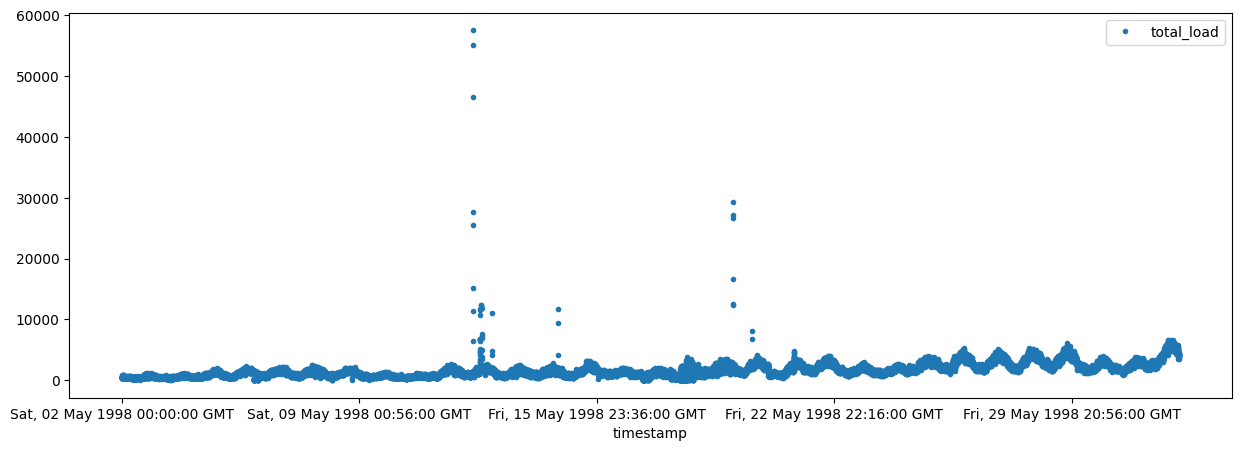

In [11]:
historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
#historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp']) 
historical_df['total_load'] = historical_df['total_load'].astype(int)
#historical_df = historical_df[ historical_df['total_load']<6000] 
historical_df = historical_df.set_index("timestamp")
historical_df =historical_df.drop(columns=[ 'average_load', 'instances'])
historical_df.plot(style=".",figsize=(15,5))
historical_df.head()
# Resample the data per hour, round to nearest hour, and sum the total_load
hourly_sum = historical_df.resample('H').sum()
hourly_sum.plot(figsize=(15,5))

<bound method NDFrame.head of                 timestamp  average_load  total_load  instances
0     1998-05-02 00:00:00       176.000         352          2
1     1998-05-02 00:01:00       186.500         373          2
2     1998-05-02 00:02:00       133.667         401          3
3     1998-05-02 00:03:00       140.000         420          3
4     1998-05-02 00:04:00       157.000         471          3
...                   ...           ...         ...        ...
43059 1998-05-31 23:55:00       192.857        2700         14
43060 1998-05-31 23:56:00       192.308        2500         13
43061 1998-05-31 23:57:00       193.462        2515         13
43062 1998-05-31 23:58:00       193.000        2509         13
43063 1998-05-31 23:59:00       192.538        2503         13

[43064 rows x 4 columns]>
                     total_load
timestamp                      
1998-05-02 00:00:00         352
1998-05-02 00:01:00         373
1998-05-02 00:02:00         401
1998-05-02 00:03:00        

<Axes: xlabel='timestamp'>

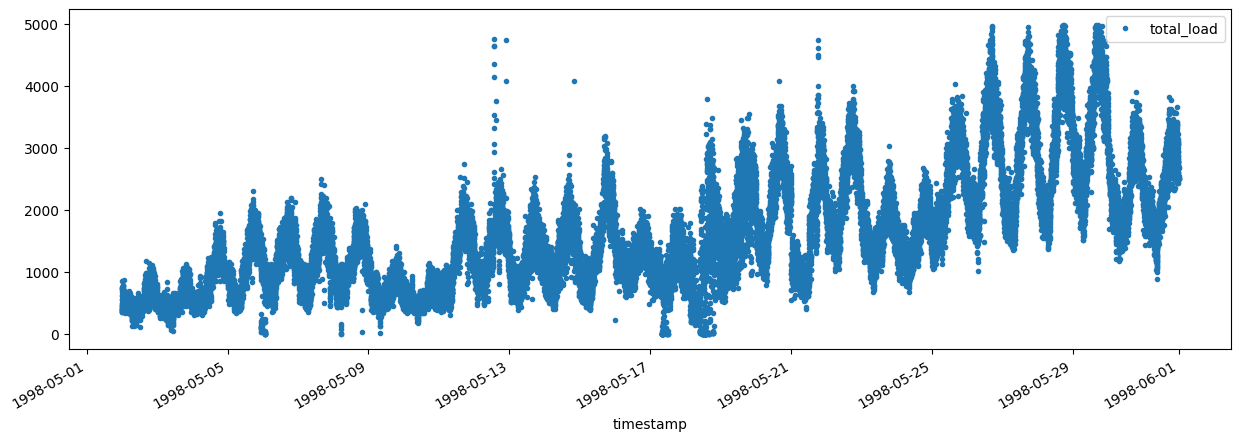

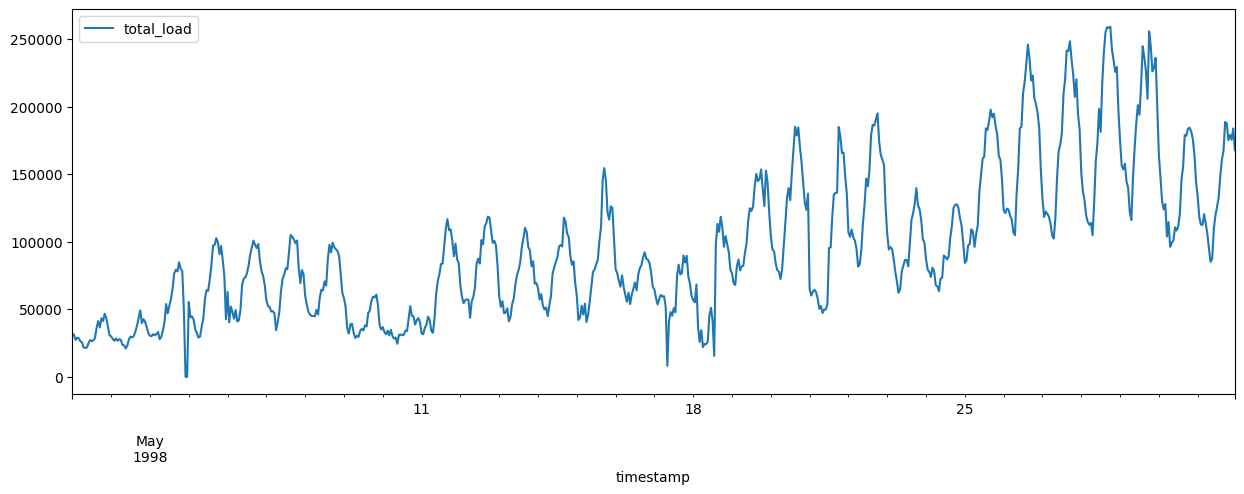

In [20]:
import pandas as pd
historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'], infer_datetime_format=True, errors='coerce') 
historical_df = historical_df.dropna(subset=['timestamp'])
print(historical_df.head)
historical_df = historical_df.set_index("timestamp")
historical_df['total_load'] = historical_df['total_load'].astype(int)
historical_df = historical_df[historical_df['total_load'] < 5000]
historical_df = historical_df.drop(columns=['average_load', 'instances'])

historical_df.plot(style=".", figsize=(15, 5))
print( historical_df.head())
hourly_sum = historical_df.resample('H').sum()
hourly_sum.plot(figsize=(15, 5))


In [21]:
print (historical_df.head(11))

                     total_load
timestamp                      
1998-05-02 00:00:00         352
1998-05-02 00:01:00         373
1998-05-02 00:02:00         401
1998-05-02 00:03:00         420
1998-05-02 00:04:00         471
1998-05-02 00:05:00         504
1998-05-02 00:06:00         561
1998-05-02 00:07:00         678
1998-05-02 00:08:00         427
1998-05-02 00:09:00         351
1998-05-02 00:10:00         477


In [22]:
print (hourly_sum.head(11))

                     total_load
timestamp                      
1998-05-02 00:00:00       31969
1998-05-02 01:00:00       31132
1998-05-02 02:00:00       27349
1998-05-02 03:00:00       29052
1998-05-02 04:00:00       28462
1998-05-02 05:00:00       26287
1998-05-02 06:00:00       25542
1998-05-02 07:00:00       21642
1998-05-02 08:00:00       21447
1998-05-02 09:00:00       21724
1998-05-02 10:00:00       24841


<Axes: xlabel='timestamp'>

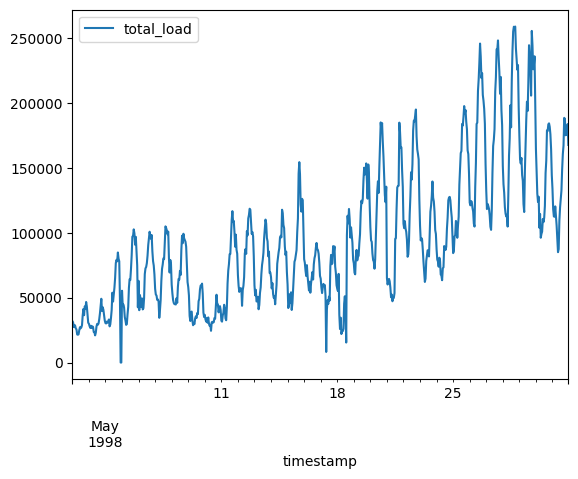

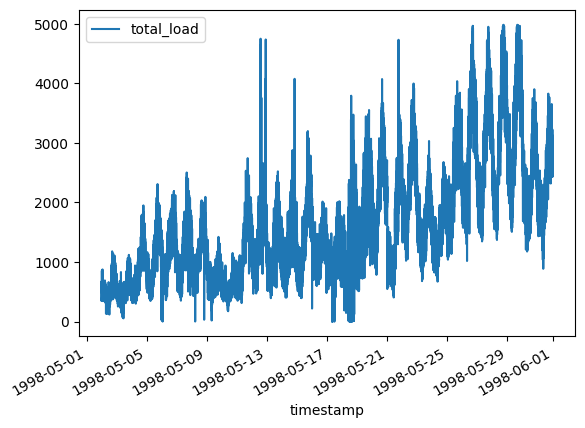

In [24]:
hourly_sum.plot()
historical_df.plot()

In [29]:
### create msk
msk = (historical_df.index < len(historical_df) -5)
df_train = historical_df[msk].copy()
df_test = historical_df[-msk].copy()

TypeError: Invalid comparison between dtype=datetime64[ns] and int

<Axes: xlabel='timestamp'>

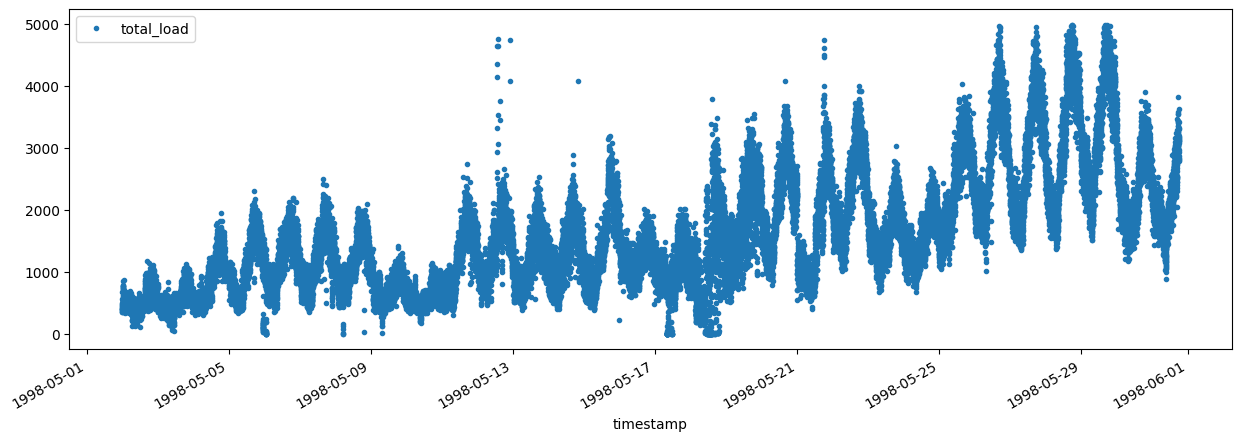

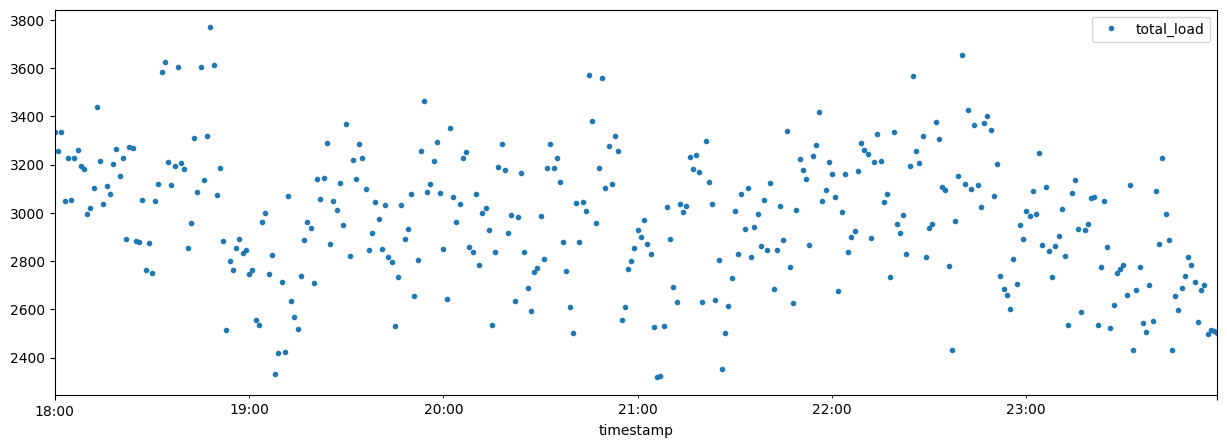

In [32]:
# Compare the index with a datetime value
msk = historical_df.index < (hourly_sum.index[-1] - pd.Timedelta(hours=5))

# Create training and test sets
df_train = historical_df[msk].copy()
df_test = historical_df[~msk].copy()

# Plot the training and test sets
df_train.plot(style=".", figsize=(15, 5), label='Train')
df_test.plot(style=".", figsize=(15, 5), label='Test')

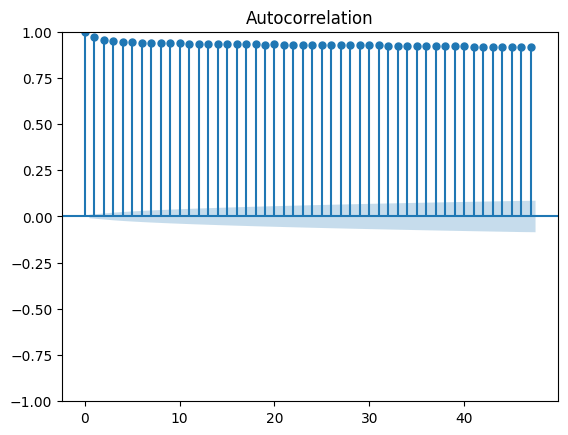

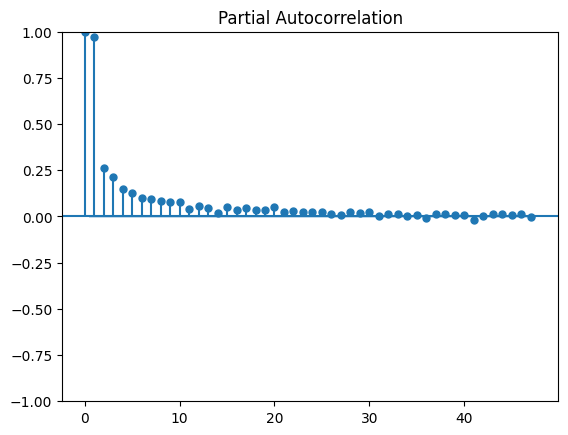

In [33]:
acf_original = plot_acf(df_train)
pact_original = plot_pacf(df_train)

In [34]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test}')

p-value: (-3.233500862246411, 0.018125587829043898, 53, 42569, {'1%': -3.430503625745691, '5%': -2.8616078991633382, '10%': -2.5668061405244895}, 575512.0652588453)


<Axes: xlabel='timestamp'>

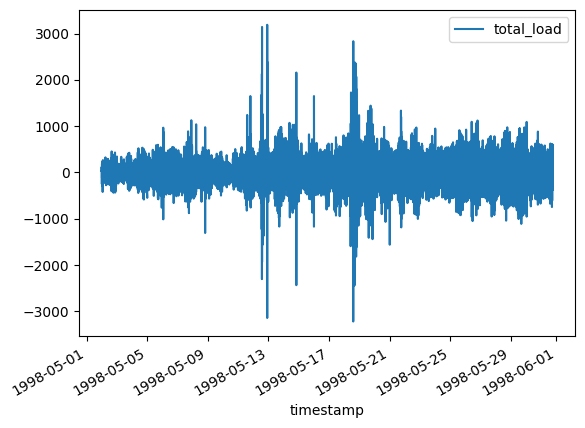

In [35]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

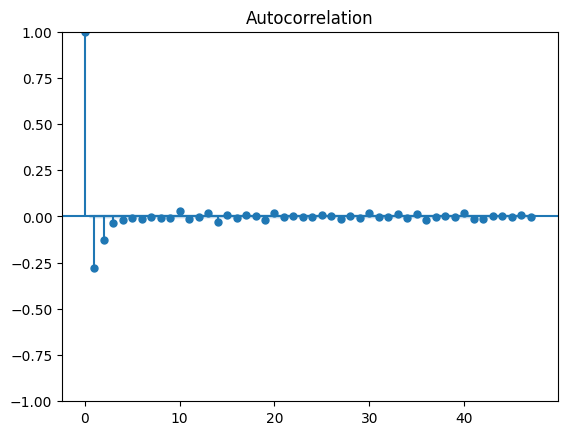

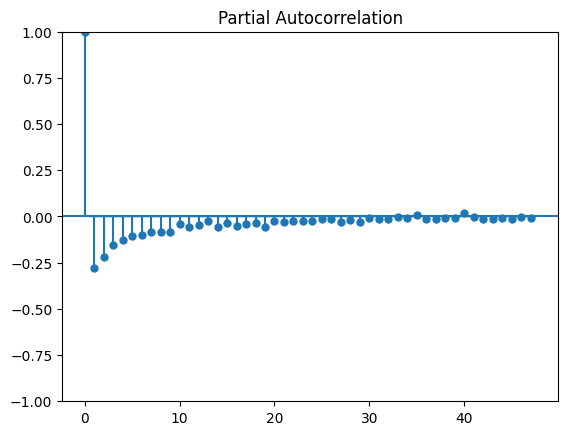

In [36]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [37]:
adf_test =adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')


p-value: 0.0
